In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/HP/10 Acadamy PRojects/Solar-Challenge-week0/data/solar-measurements_benin-malanville_qc.csv', encoding='latin1')


C:\Users\HP\AppData\Local\Temp\ipykernel_9104\1236802749.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/HP/10 Acadamy PRojects/Solar-Challenge-week0/data/solar-measurements_benin-malanville_qc.csv', encoding='latin1')


In [3]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,W/m²,W/m²,W/m²,W/m²,W/m²,°C,%,m/s,m/s,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2021-08-09 00:01,-1.2,-0.2,-1.1,0,0,26.2,93.4,0,0.4,0.1,122.1,0,998,0,0,26.3,26.2,NaN
2,2021-08-09 00:02,-1.1,-0.2,-1.1,0,0,26.2,93.6,0,0,0,0,0,998,0,0,26.3,26.2,NaN
3,2021-08-09 00:03,-1.1,-0.2,-1.1,0,0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0,26.4,26.2,NaN
4,2021-08-09 00:04,-1.1,-0.1,-1,0,0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0,26.4,26.3,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525601 non-null  object 
 1   GHI            525601 non-null  object 
 2   DNI            525601 non-null  object 
 3   DHI            525601 non-null  object 
 4   ModA           525601 non-null  object 
 5   ModB           525601 non-null  object 
 6   Tamb           525601 non-null  object 
 7   RH             525601 non-null  object 
 8   WS             525601 non-null  object 
 9   WSgust         525601 non-null  object 
 10  WSstdev        525601 non-null  object 
 11  WD             525601 non-null  object 
 12  WDstdev        525601 non-null  object 
 13  BP             525601 non-null  object 
 14  Cleaning       525601 non-null  object 
 15  Precipitation  525601 non-null  object 
 16  TModA          525601 non-null  object 
 17  TModB          525601 non-nul

# Convert all columns to numeric

In [5]:
# Try to convert all columns to numeric where possible
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Get only numeric columns
numeric_cols = df_numeric.select_dtypes(include=['number'])

# Display them
print("Numeric Columns:")
print(numeric_cols.columns)

# Optional: Check summary stats
print("\nSummary Statistics:")
print(numeric_cols.describe())


Numeric Columns:
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

Summary Statistics:
       Timestamp            GHI            DNI            DHI           ModA  \
count        0.0  525600.000000  525600.000000  525600.000000  525600.000000   
mean         NaN     240.559452     167.187516     115.358961     236.589496   
std          NaN     331.131327     261.710501     158.691074     326.894859   
min          NaN     -12.900000      -7.800000     -12.600000       0.000000   
25%          NaN      -2.000000      -0.500000      -2.100000       0.000000   
50%          NaN       1.800000      -0.100000       1.600000       4.500000   
75%          NaN     483.400000     314.200000     216.300000     463.700000   
max          NaN    1413.000000     952.300000     759.200000    1342.300000   

                ModB    

In [6]:
numeric_cols.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998.0,0.0,0.0,26.3,26.2,NaN
2,NaN,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998.0,0.0,0.0,26.3,26.2,NaN
3,NaN,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997.0,0.0,0.0,26.4,26.2,NaN
4,NaN,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997.0,0.0,0.0,26.4,26.3,NaN


In [7]:
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      0 non-null       float64
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  float64
 14  Cleaning       525600 non-null  float64
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525601
dtype: int64

# Columns with >5% missing values

In [9]:
# Total rows
total_rows = len(df)

# Count of missing values per column
missing_counts = df.isna().sum()

# Percentage of missing values
missing_percentage = (missing_counts / total_rows) * 100

# Filter columns with >5% missing values
columns_over_5_percent_nulls = missing_percentage[missing_percentage > 5]

# Display result
print("Columns with >5% missing values:")
print(columns_over_5_percent_nulls)

Columns with >5% missing values:
Comments    100.0
dtype: float64


# Cleaned Copy of Df

In [10]:

# Make a copy of your df
df_clean = df.copy()

# List of relevant columns
cols_to_clean = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Convert to numeric (coerce invalid to NaN)
df_clean[cols_to_clean] = df_clean[cols_to_clean].apply(pd.to_numeric, errors='coerce')


In [11]:
df_clean.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,NaN,NaN,NaN,NaN,NaN,°C,%,NaN,NaN,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0,998,0,0,26.3,26.2,NaN
2,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0,0,0,998,0,0,26.3,26.2,NaN
3,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0,26.4,26.2,NaN
4,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0,26.4,26.3,NaN


In [12]:
# Fill missing values with column median
df_clean[cols_to_clean] = df_clean[cols_to_clean].fillna(df_clean[cols_to_clean].median())

In [13]:
df_clean.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,1.8,-0.1,1.6,4.5,4.3,°C,%,1.9,2.6,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0,998,0,0,26.3,26.2,NaN
2,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0,0,0,998,0,0,26.3,26.2,NaN
3,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0,26.4,26.2,NaN
4,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0,26.4,26.3,NaN


In [14]:
df_clean["Comments"].value_counts()

Series([], Name: count, dtype: int64)

# Droping Comment column

In [15]:
df_clean = df_clean.drop(columns=['Comments'])

In [16]:
df_clean.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,yyyy-mm-dd hh:mm,1.8,-0.1,1.6,4.5,4.3,°C,%,1.9,2.6,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C
1,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0,998,0,0,26.3,26.2
2,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0,0,0,998,0,0,26.3,26.2
3,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0,26.4,26.2
4,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0,26.4,26.3


# Z-score


In [17]:
# Compute Z-scores
z_scores = np.abs(zscore(df_clean[cols_to_clean]))



In [18]:
print("z_scores", z_scores)

z_scores [[0.72104121 0.63920802 0.71685762 ... 0.70950256 0.1378968  0.10309635]
 [0.73010108 0.63959012 0.73387183 ... 0.72308711 1.32283226 1.18731243]
 [0.72979908 0.63959012 0.73387183 ... 0.72308711 1.32283226 1.38444263]
 ...
 [0.74308688 0.63920802 0.76348917 ... 0.72308711 0.94864212 0.84233459]
 [0.74308688 0.63920802 0.76348917 ... 0.72308711 0.76154704 0.74376949]
 [0.74308688 0.63920802 0.76285901 ... 0.72308711 0.57445197 0.59592184]]


In [19]:
# Create a boolean mask for any row with outliers in any column
outlier_mask = (z_scores > 3).any(axis=1)

In [20]:
df_clean.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,yyyy-mm-dd hh:mm,1.8,-0.1,1.6,4.5,4.3,°C,%,1.9,2.6,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C
1,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0,998,0,0,26.3,26.2
2,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0,0,0,998,0,0,26.3,26.2
3,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0,26.4,26.2
4,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0,26.4,26.3


# Out liers ploting 


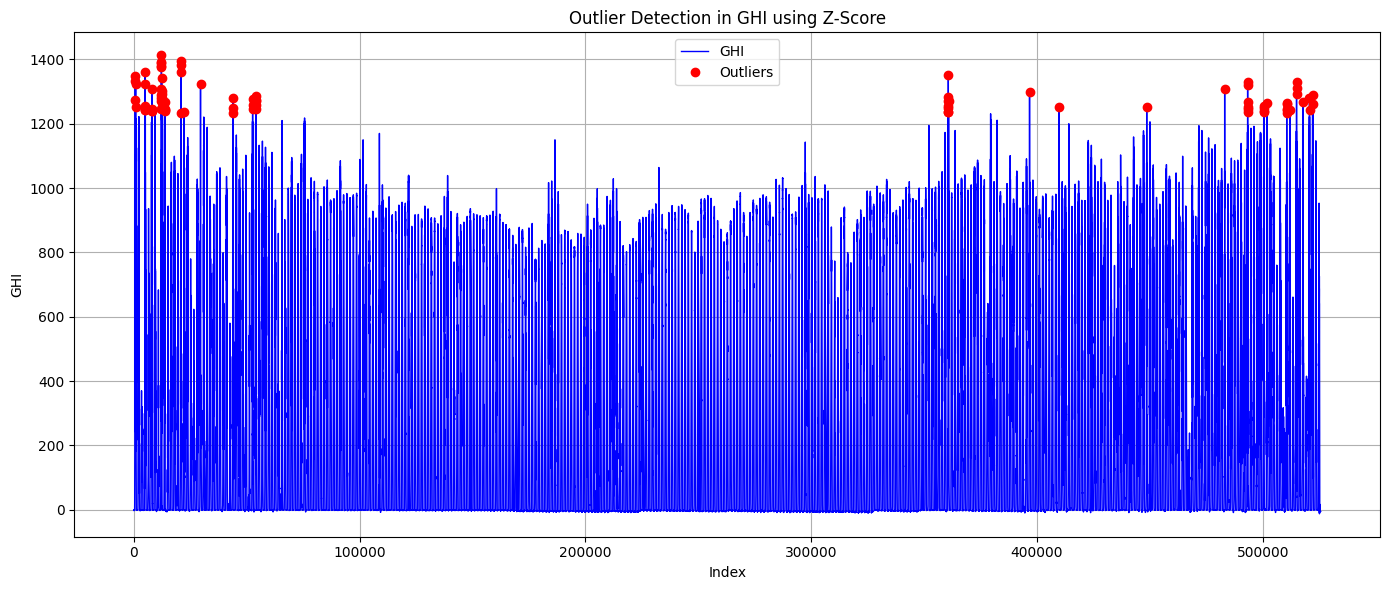

In [21]:
import matplotlib.pyplot as plt

# Choose the column to visualize (you can change this)
col = 'GHI'

# Convert to numeric (if not already)
df[col] = pd.to_numeric(df[col], errors='coerce')

# Compute Z-scores
z_scores = zscore(df[col], nan_policy='omit')

# Identify outliers
outliers = np.abs(z_scores) > 3

# Plot line chart
plt.figure(figsize=(14, 6))
plt.plot(df[col], label='GHI', color='blue', linewidth=1)

# Plot outliers as red dots
plt.plot(df.index[outliers], df[col][outliers], 'ro', label='Outliers')

plt.title(f'Outlier Detection in {col} using Z-Score')
plt.xlabel('Index')
plt.ylabel(col)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
df_clean.to_csv('C:/Users/HP/10 Acadamy PRojects/Solar-Challenge-week0/data/cleaned/solar-measurements_benin-malanville_cleaned.csv', index=False)

# Time Series Analysis

In [23]:
# Convert Timestamp column to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_9104\214398381.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')


In [24]:
df_clean.set_index('Timestamp', inplace=True)

In [25]:
print("\n🔹 df_clean:", df_clean)


🔹 df_clean:                      GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
NaT                  1.8 -0.1  1.6   4.5   4.3    °C     %  1.9     2.6   
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
...                  ...  ...  ...   ...   ...   ...   ...  ...     ...   
2022-08-08 23:56:00 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
2022-08-08 23:57:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
2022-08-08 23:58:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
2022-08-08 23:59:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
2022-08-09 00:00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

           

C:\Users\HP\AppData\Local\Temp\ipykernel_9104\3772956998.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


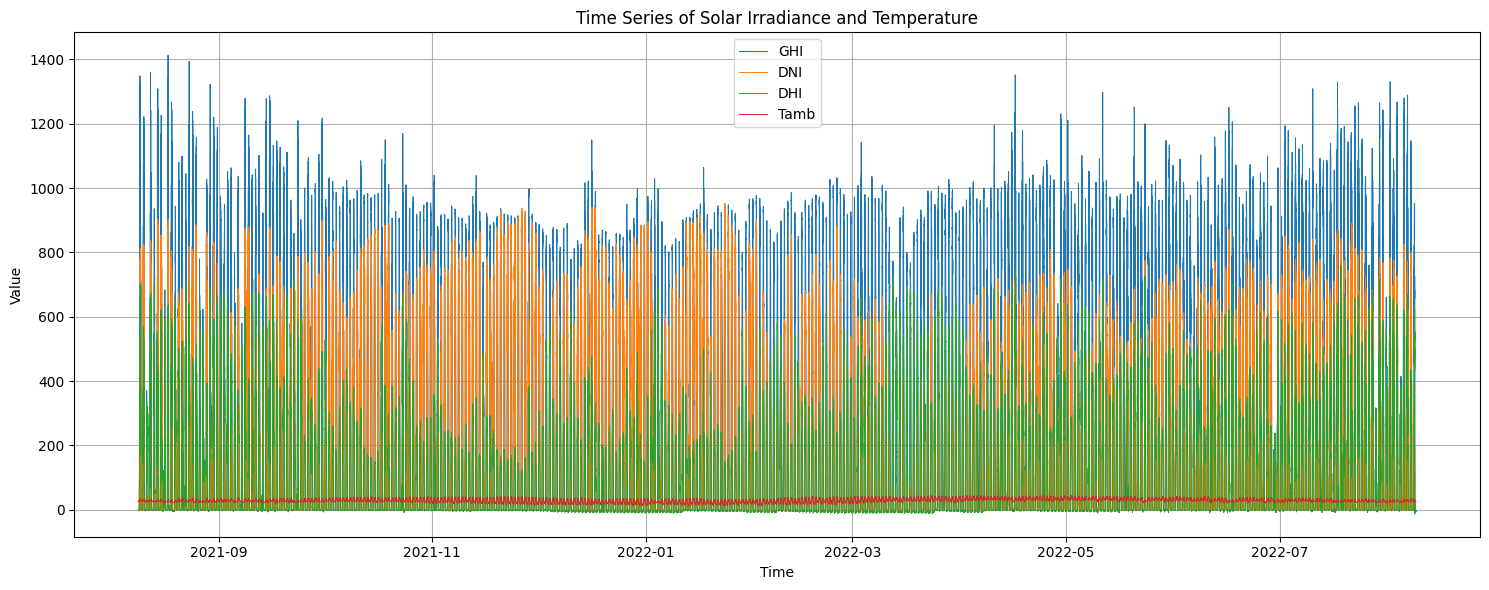

In [26]:
# Columns to plot
cols = ['GHI', 'DNI', 'DHI', 'Tamb']

# Convert columns to numeric
df_clean[cols] = df_clean[cols].apply(pd.to_numeric, errors='coerce')

# Plot
plt.figure(figsize=(15, 6))
for col in cols:
    plt.plot(df_clean.index, df_clean[col], label=col, linewidth=0.7)

plt.title("Time Series of Solar Irradiance and Temperature")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# patterns by month

C:\Users\HP\AppData\Local\Temp\ipykernel_9104\815920813.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_clean[cols].resample('M').mean()


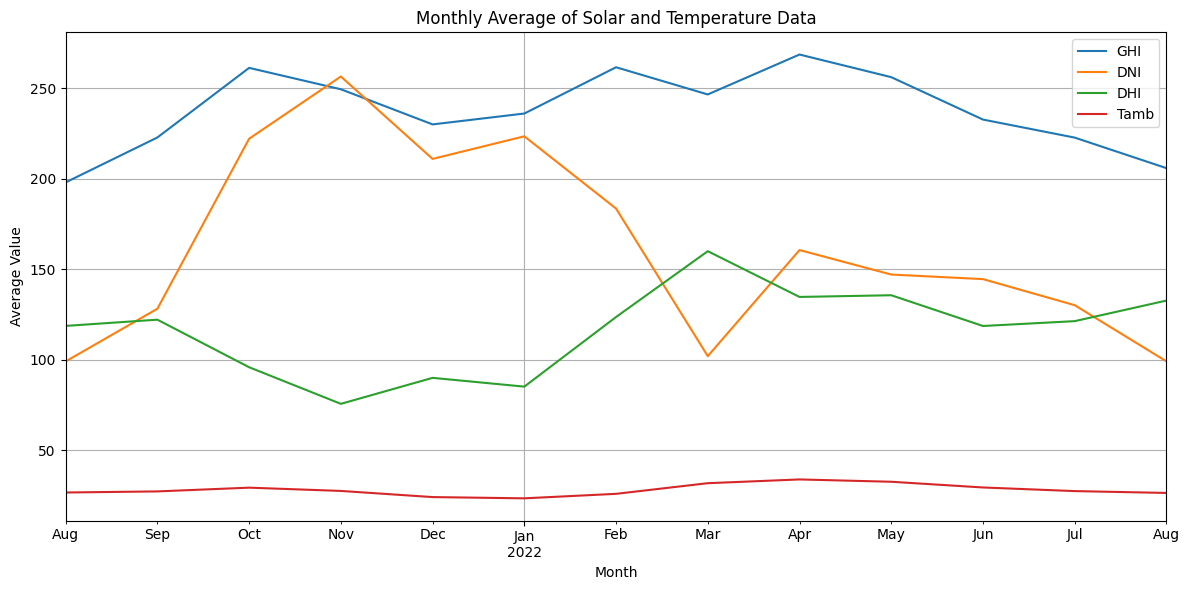

In [27]:
# Group by month
monthly_avg = df_clean[cols].resample('M').mean()

# Plot
monthly_avg.plot(figsize=(12, 6), title="Monthly Average of Solar and Temperature Data")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.grid(True)
plt.tight_layout()
plt.show()


# analyze Daily Patterns

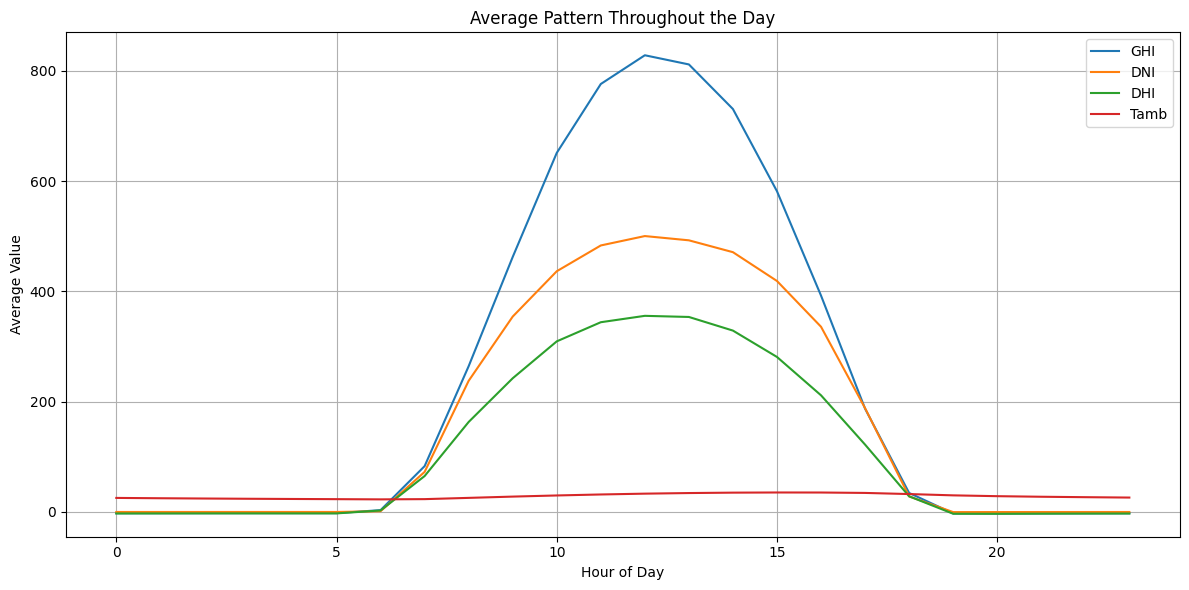

In [28]:
# Extract hour from timestamp
df_clean['Hour'] = df_clean.index.hour

# Average by hour of day
hourly_avg = df_clean.groupby('Hour')[cols].mean()

# Plot
hourly_avg.plot(figsize=(12, 6), title="Average Pattern Throughout the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.grid(True)
plt.tight_layout()
plt.show()


# Detect anomalies

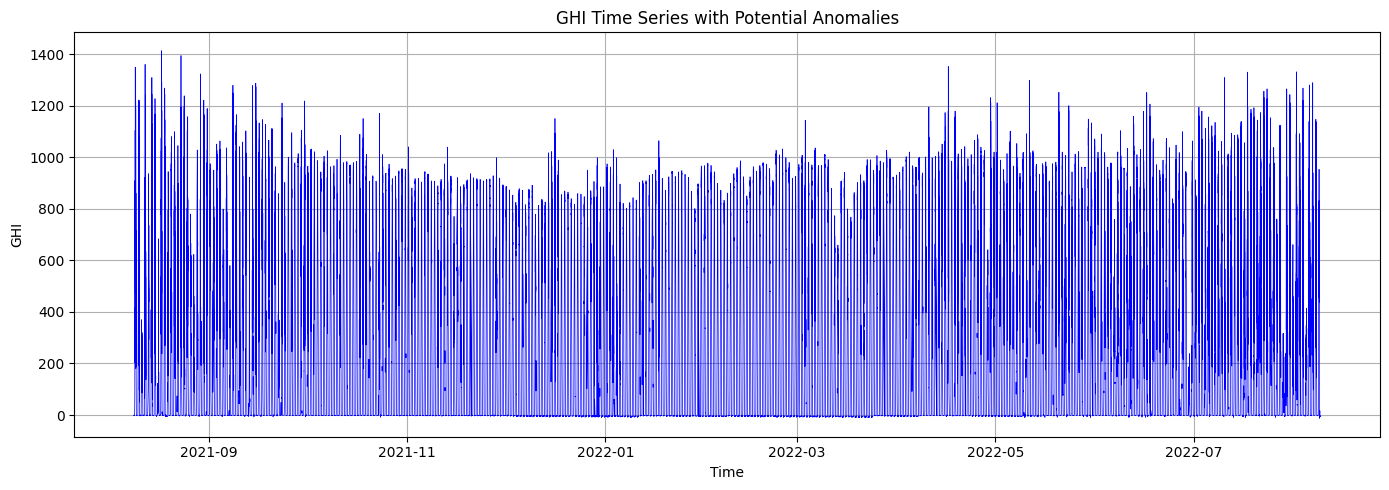

In [29]:
# You can visualize GHI with anomalies
plt.figure(figsize=(14, 5))
plt.plot(df_clean.index, df_clean['GHI'], label='GHI', color='blue', linewidth=0.5)
plt.title("GHI Time Series with Potential Anomalies")
plt.xlabel("Time")
plt.ylabel("GHI")
plt.grid(True)
plt.tight_layout()
plt.show()


# Cleaning Impact Analysis

In [30]:
df_clean[['ModA', 'ModB']] = df_clean[['ModA', 'ModB']].apply(pd.to_numeric, errors='coerce')
mod_avg = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(mod_avg)



                ModA        ModB
Cleaning                        
0         239.820500  231.603112
1         310.895991  304.306236
0         186.937643  186.889628
1         261.497222  272.861111
1 or 0      4.500000    4.300000


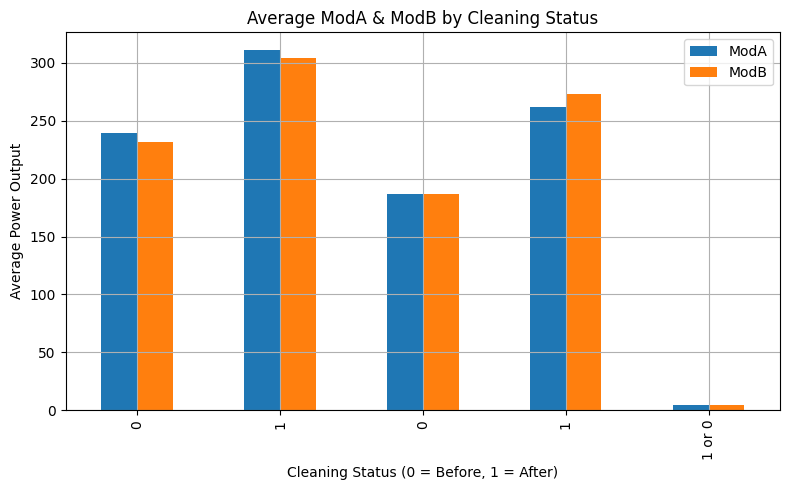

In [31]:
mod_avg.plot(kind='bar', figsize=(8, 5), title='Average ModA & ModB by Cleaning Status')
plt.xlabel('Cleaning Status (0 = Before, 1 = After)')
plt.ylabel('Average Power Output')
plt.grid(True)
plt.tight_layout()
plt.show()


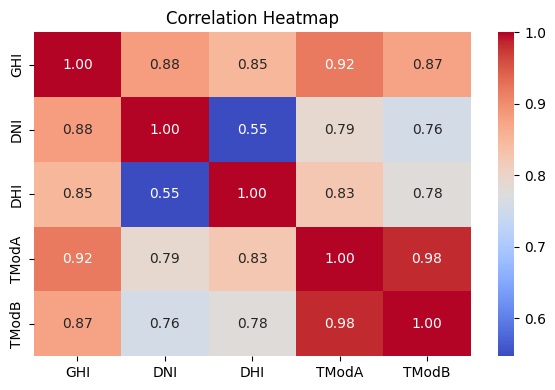

In [32]:
# Ensure numeric types
cols_corr = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
df_clean[cols_corr] = df_clean[cols_corr].apply(pd.to_numeric, errors='coerce')

# Correlation matrix
corr = df_clean[cols_corr].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


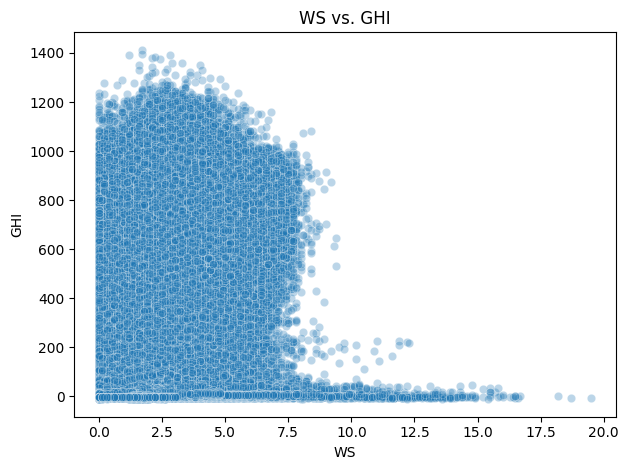

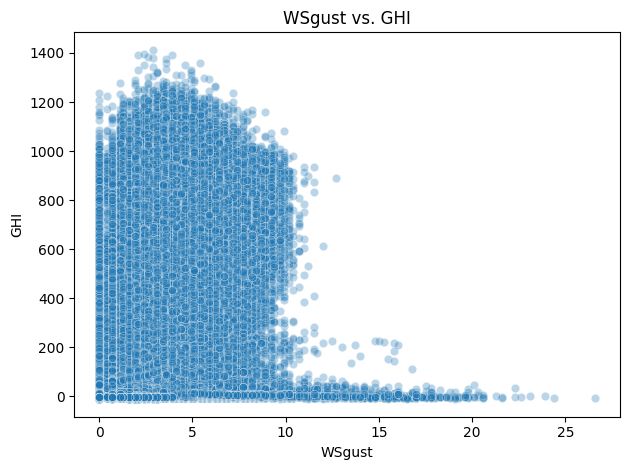

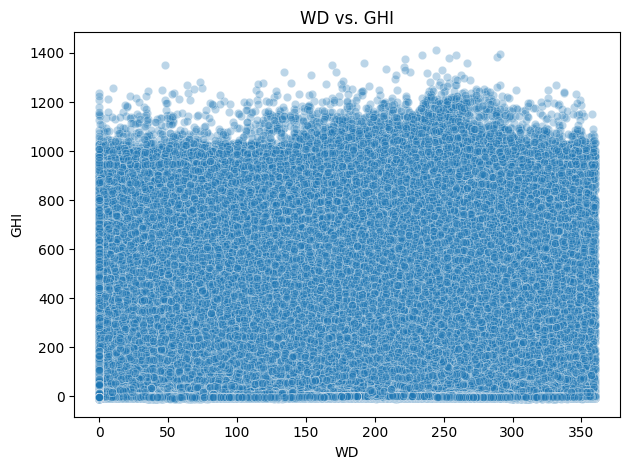

In [33]:
scatter_cols = ['WS', 'WSgust', 'WD']
for col in scatter_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    sns.scatterplot(data=df_clean, x=col, y='GHI', alpha=0.3)
    plt.title(f'{col} vs. GHI')
    plt.tight_layout()
    plt.show()


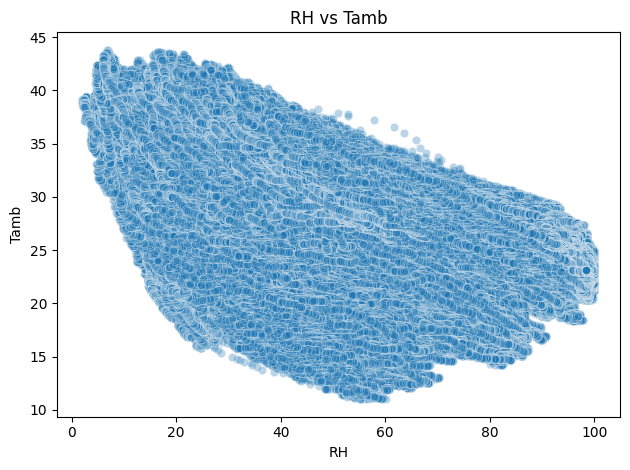

In [34]:
# Convert to numeric
df_clean[['RH', 'Tamb']] = df_clean[['RH', 'Tamb']].apply(pd.to_numeric, errors='coerce')

# RH vs Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.3)
plt.title('RH vs Tamb')
plt.tight_layout()
plt.show()



In [35]:
df_clean[['WS', 'WD']] = df_clean[['WS', 'WD']].apply(pd.to_numeric, errors='coerce')


In [36]:
# Sample for performance
df_sample = df_clean[['WS', 'WD']].dropna().sample(10000)

# Wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(df_sample['WD'], df_sample['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose (Direction vs Speed)")
ax.set_legend()
plt.show()


NameError: name 'WindroseAxes' is not defined

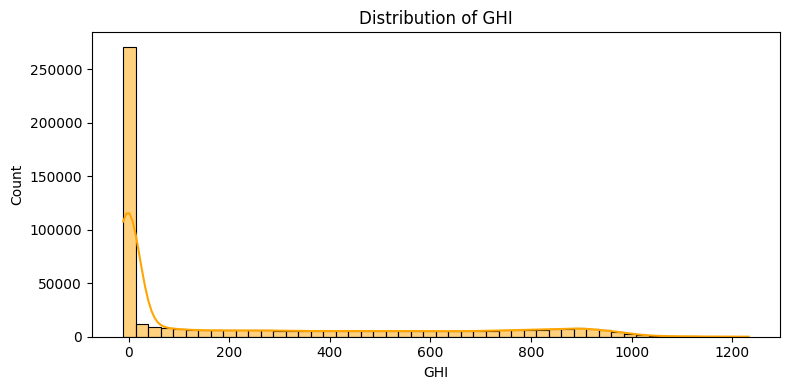

In [ ]:

# Convert GHI to numeric if needed
df_clean['GHI'] = pd.to_numeric(df_clean['GHI'], errors='coerce')

# Plot GHI histogram
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['GHI'].dropna(), bins=50, kde=True, color='orange')
plt.title("Distribution of GHI")
plt.xlabel("GHI")
plt.tight_layout()
plt.show()



In [ ]:
cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
df_clean[cols] = df_clean[cols].apply(pd.to_numeric, errors='coerce')


In [ ]:
print(df_clean[cols].corr()['RH'].sort_values(ascending=False))


RH      1.000000
DHI    -0.278337
GHI    -0.353637
DNI    -0.371654
Tamb   -0.409507
Name: RH, dtype: float64


# RH VS Tamb

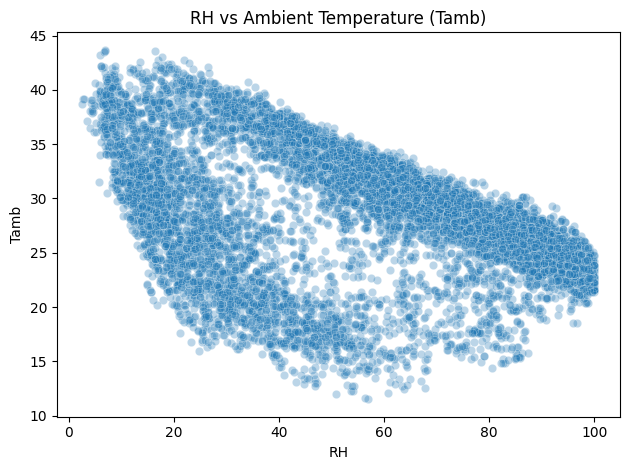

In [ ]:


sns.scatterplot(data=df_clean.sample(10000), x='RH', y='Tamb', alpha=0.3)
plt.title("RH vs Ambient Temperature (Tamb)")
plt.tight_layout()
plt.show()


# RH Vs GHI

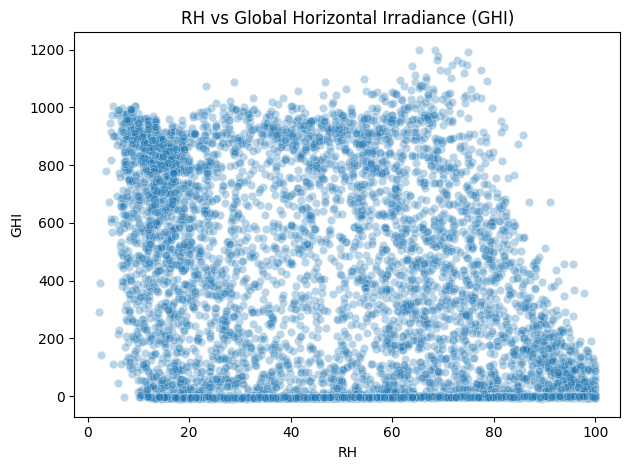

In [ ]:
sns.scatterplot(data=df_clean.sample(10000), x='RH', y='GHI', alpha=0.3)
plt.title("RH vs Global Horizontal Irradiance (GHI)")
plt.tight_layout()
plt.show()


In [39]:
df_clean[['GHI', 'Tamb', 'RH', 'BP']] = df_clean[['GHI', 'Tamb', 'RH', 'BP']].apply(pd.to_numeric, errors='coerce')
df_sample = df_clean[['GHI', 'Tamb', 'RH', 'BP']].dropna().sample(5000)

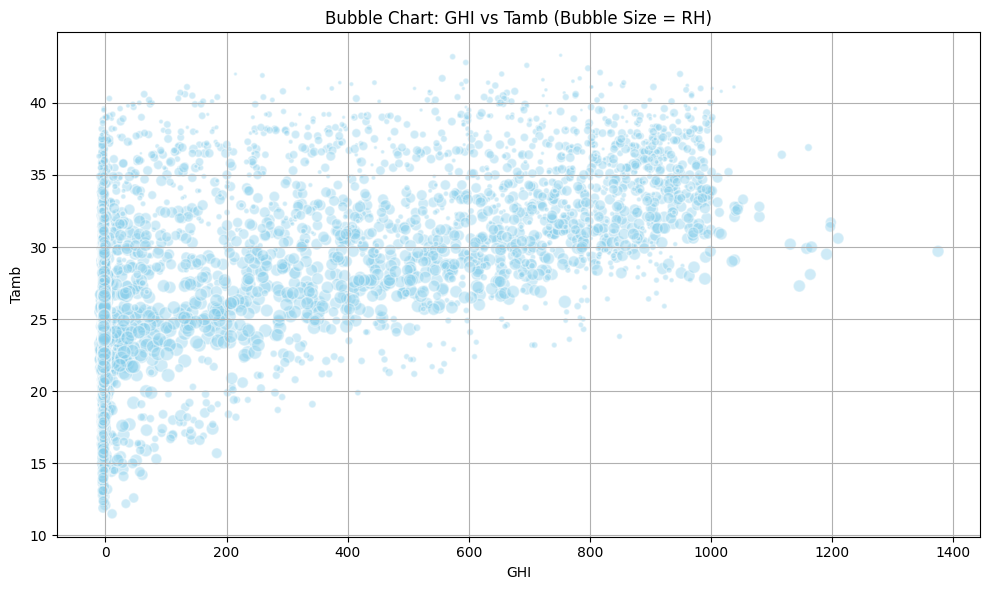

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sample['GHI'], df_sample['Tamb'], 
            s=df_sample['RH'],  # bubble size = RH
            alpha=0.4, c='skyblue', edgecolors='w')

plt.title("Bubble Chart: GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.grid(True)
plt.tight_layout()
plt.show()
